In [120]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


### Load all the required libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [122]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns


In [123]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.ndimage import gaussian_filter

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

### Load the train and test data.

In [125]:
test_data = pd.read_csv('../input/kepler-labelled-time-series-data/exoTest.csv')
train_data = pd.read_csv('../input/kepler-labelled-time-series-data/exoTrain.csv')

In [126]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


Now the target column LABEL consists of two categories 1(Does not represents exoplanet) and 2(represents the presence of exoplanet). So, convert them to binary values for easier processing of data.

In [127]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [128]:
test_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,1,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,1,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,1,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,0,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,0,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,0,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [129]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [130]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


Now visualize the target column in the train_dataset and get an idea about the class distribution.

In [131]:
train_data['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

We have 5050 records of non-exoplanets and 37 records of exoplanets.

Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

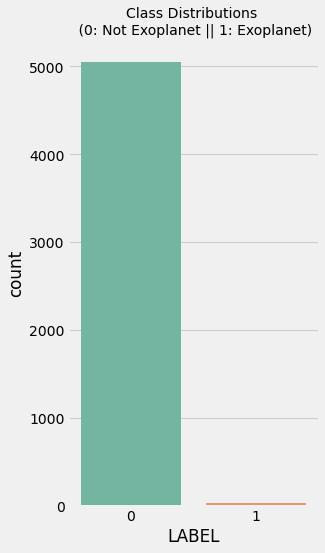

In [132]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette = "Set2")
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)

It turns out that the data is highly imbalanced so later on we'll be using some sampling techniques to balance the data.

**Flux :** the intensity of light recived from a planet

### Let us plot the first 4 rows of the train data and observe the intensity of flux values.

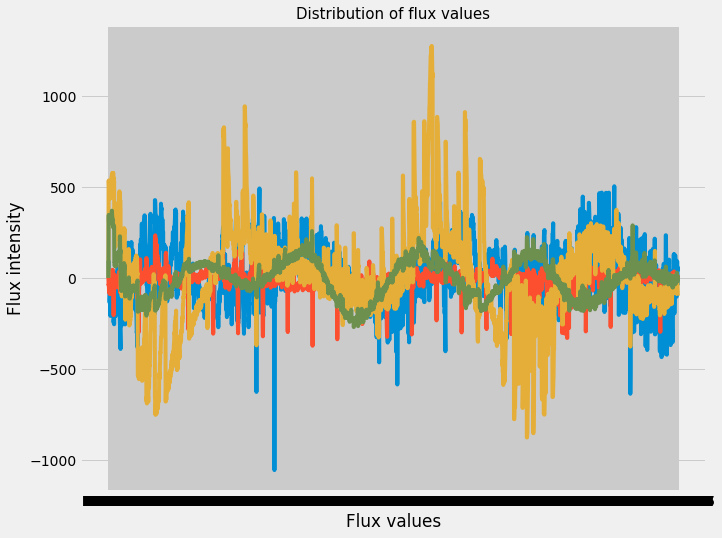

In [133]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.show()

### Detecting outliers using Boxplot

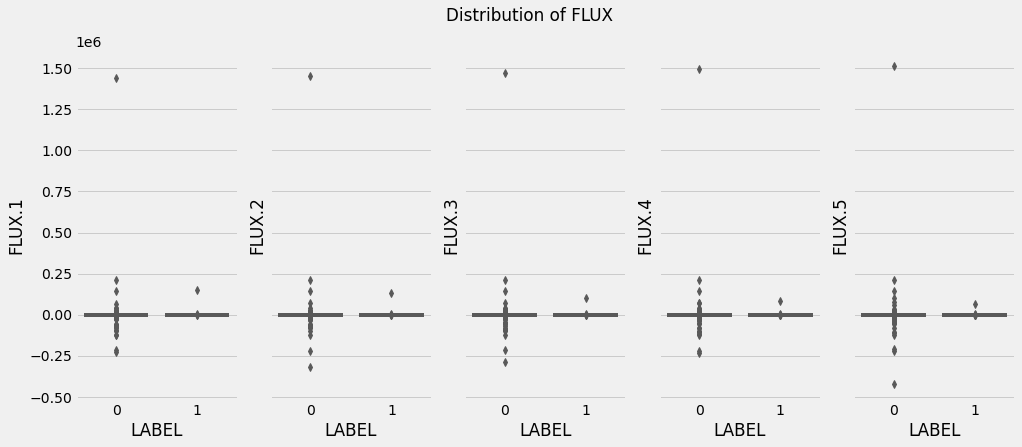

In [137]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")


In [138]:
print('Dropping Outliers')
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


### Split the dataset

So let us first split our dataset and normalize it.

In [139]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

### Data Normalization

**Data Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [140]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

### Apply gaussian filters

The next step is to apply gaussian filters to both test and train.


In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

In [141]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

### Feature scaling

we use feature scaling so that all the values remain in the comparable range.

In [142]:
#Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

Since the dataset is highly imbalanced even if the model predicts the same class for all data points the accuracy.

So let us first balance the classes and model it again.

### Balancing the class using SMOTE

**SMOTE** **(synthetic minority oversampling technique)** is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. **SMOTE** synthesises new minority instances between existing minority instances.

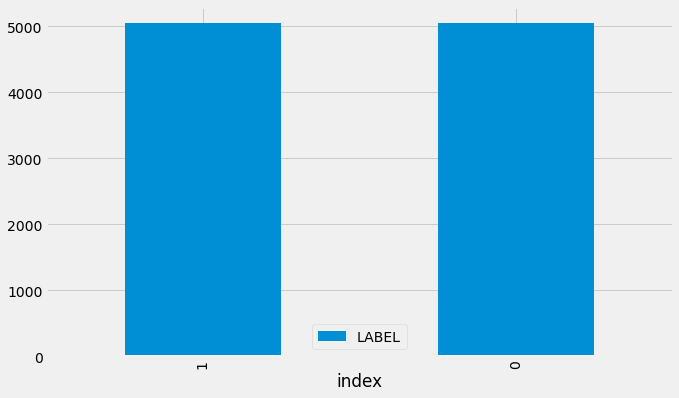

In [143]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_sample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')


### Split the dataset

In [158]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

In [161]:
print(train_X)

           FLUX.1       FLUX.2       FLUX.3       FLUX.4       FLUX.5  \
6605   509.689265   508.800058   502.700956   482.377484   447.193556   
8869    62.669197    82.320368    60.001976    44.152518    50.472015   
8061   134.381864   145.694383   133.253847   110.829351   104.253304   
8971  -979.215833  -983.589933  -991.167251  -972.160929  -939.146383   
4202     2.370000    -4.880000     4.590000    -9.290000     3.120000   
...           ...          ...          ...          ...          ...   
5734 -1819.910471 -1770.377818 -1919.088277 -2004.263303 -1951.548222   
5191   -50.699291   -63.010450   -64.942624   -61.299316   -61.149449   
5390    37.428079    67.003958    47.363726    27.812746    44.398524   
860   -113.250000  -203.500000  -117.690000  -248.520000  -209.450000   
7270   -93.164454   -90.818151  -100.419942   -79.049462   -83.146710   

           FLUX.6       FLUX.7       FLUX.8       FLUX.9      FLUX.10  ...  \
6605   451.104233   462.141468   470.326601  

In [145]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=13)
lr_model = LogisticRegression(class_weight='balanced')
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
knn_model = KNeighborsClassifier()

In [146]:
ds_model.fit(train_X,train_y)

prediction_ds = ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction_ds,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction_ds)))

Validation accuracy of Decision Tree is 0.9147914791479148

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1709
           1       0.86      0.98      0.92      1624

    accuracy                           0.91      3333
   macro avg       0.92      0.92      0.91      3333
weighted avg       0.92      0.91      0.91      3333



In [147]:
# Train the model
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, random_state=13)

In [148]:
#Confusion matrix Make it a function so just call it from everywhere
def confm(test_y, prediction):
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)

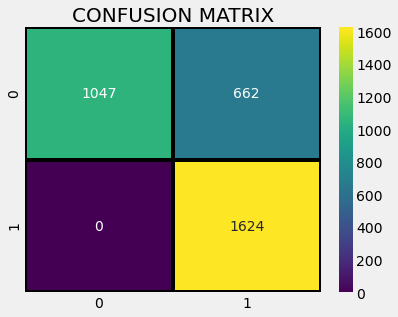

In [149]:
confm(test_y,prediction)

In [150]:
knn_model.fit(train_X,train_y)

prediction_knn=knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction_knn,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction_knn)))

Validation accuracy of KNN is 0.9816981698169817

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



In [151]:
lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

Validation accuracy of Logistic Regression is 0.8061806180618062

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      1709
           1       0.72      1.00      0.83      1624

    accuracy                           0.81      3333
   macro avg       0.86      0.81      0.80      3333
weighted avg       0.86      0.81      0.80      3333



As we can observe after applying SMOTE to balance the classes, our ML models are performing really good.

In [152]:
# --- 4. Model Training and Evaluation ---
# a) Random Forest
print("--- Random Forest ---")
# Make predictions
prediction_rf = rf_model.predict(test_X)

# Evaluate the model
print('Validation accuracy of Random Forest is', accuracy_score(prediction_rf, test_y))
print("\nClassification report:\n", classification_report(test_y, prediction_rf))
print("\\n")


# b) K-Nearest Neighbors
print("--- K-Nearest Neighbors ---")
prediction_knn=knn_model.predict(test_X)
print('Validation accuracy of KNN is', accuracy_score(prediction_knn,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction_knn)))
print("\\n")

# d) Logistic Regression
print("--- Logistic Regression ---")
lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))
print("\\n")


# e) Decision Tree
print("--- Decision Tree ---")
prediction_ds = ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction_ds,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction_ds)))
print("\\n")




--- Random Forest ---
Validation accuracy of Random Forest is 0.9912991299129913

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1709
           1       0.98      1.00      0.99      1624

    accuracy                           0.99      3333
   macro avg       0.99      0.99      0.99      3333
weighted avg       0.99      0.99      0.99      3333

\n
--- K-Nearest Neighbors ---
Validation accuracy of KNN is 0.9816981698169817

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333

\n
--- Logistic Regression ---
Validation accuracy of Logistic Regression is 0.8061806180618062

Classification report :
             

In [154]:
# f) Voting Classifier (as you started in your notebook)
print("--- Voting Classifier ---")
# Let's use the models we've already trained
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('knn', knn_model), ('lr', lr_model)],
    voting='hard' # 'hard' uses majority voting, 'soft' uses predicted probabilities
)
voting_clf.fit(train_X,train_y)
y_pred_voting = voting_clf.predict(test_X)
print(classification_report(test_y, y_pred_voting))
print("Accuracy:", accuracy_score(test_y, y_pred_voting))

--- Voting Classifier ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1709
           1       0.97      1.00      0.99      1624

    accuracy                           0.99      3333
   macro avg       0.99      0.99      0.99      3333
weighted avg       0.99      0.99      0.99      3333

Accuracy: 0.9870987098709871


In [ ]:
# f) Voting Classifier (as you started in your notebook)
print("--- Voting Classifier ---")
# Let's use the models we've already trained
voting_clfs = VotingClassifier(
    estimators=[('rf', rf_model), ('knn', knn_model), ('lr', lr_model)],
    voting='soft' # 'hard' uses majority voting, 'soft' uses predicted probabilities
)
voting_clfs.fit(train_X,train_y)
y_pred_voting = voting_clfs.predict(test_X)
print(classification_report(test_y, y_pred_voting))
print("Accuracy:", accuracy_score(test_y, y_pred_voting))

In [155]:
# --- 2. Train the Gaussian Naive Bayes Classifier ---
print("--- Training Gaussian Naive Bayes Classifier ---")
nb_model = GaussianNB()
nb_model.fit(train_X,train_y)

print("Model training complete.")

--- Training Gaussian Naive Bayes Classifier ---
Model training complete.


In [162]:
# --- 3. Function to Get Feature Contributions for Explainability ---

def get_feature_contributions(model, instance, feature_names, class_names):
    """
    Calculates the contribution of each feature to the Naive Bayes prediction.

    Args:
        model: A trained scikit-learn GaussianNB model.
        instance: A single data point (1D numpy array) for which to explain the prediction.
        feature_names: A list of names for the features.
        class_names: A dictionary mapping class indices (0, 1) to class names.

    Returns:
        A pandas DataFrame with the top 5 feature contributions.
    """
    contributions = []
    predicted_class = model.predict([instance])[0]

    for i, feature_value in enumerate(instance):
        # Calculate the log-likelihood for each class
        log_likelihood_class_0 = -0.5 * np.log(2 * np.pi * model.sigma_[0, i]) - \
                                 ((feature_value - model.theta_[0, i]) ** 2 / (2 * model.sigma_[0, i]))
        log_likelihood_class_1 = -0.5 * np.log(2 * np.pi * model.sigma_[1, i]) - \
                                 ((feature_value - model.theta_[1, i]) ** 2 / (2 * model.sigma_[1, i]))

        # The contribution is the absolute difference in log-likelihoods
        contribution = abs(log_likelihood_class_1 - log_likelihood_class_0)
        
        # Determine which class this feature supports more
        supports_class = class_names[1] if log_likelihood_class_1 > log_likelihood_class_0 else class_names[0]

        contributions.append({
            'Feature': feature_names[i],
            'Contribution': contribution,
            'Supports': supports_class
        })

    # Create a DataFrame and sort by contribution
    contributions_df = pd.DataFrame(contributions)
    top_5 = contributions_df.sort_values(by='Contribution', ascending=False).head(5)
    
    return top_5, class_names[predicted_class]




In [165]:
# --- 4. Example Usage: Explain a Prediction ---

# Choose an instance to explain (e.g., the first instance in the test set)
instance_to_explain = test_X.iloc[0]
true_label = test_y.iloc[0]

# Define your class names
class_names = {0: 'Not Exoplanet', 1: 'Exoplanet'}

# Get the feature contributions
top_features_df, predicted_label = get_feature_contributions(nb_model, 
                                                              instance_to_explain, 
                                                              X.columns, 
                                                              class_names)

# Display the results
print(f"\\n--- Explainability Report ---")
print(f"True Label: {class_names[true_label]}")
print(f"Predicted Label: {predicted_label}")
print("\\nTop 5 Contributing Features:")
print(top_features_df.to_string(index=False))

\n--- Explainability Report ---
True Label: Exoplanet
Predicted Label: Exoplanet
\nTop 5 Contributing Features:
   Feature  Contribution   Supports
 FLUX.1361      5.518804  Exoplanet
 FLUX.1359      5.464588  Exoplanet
 FLUX.2245      5.334743  Exoplanet
 FLUX.1360      5.272664  Exoplanet
 FLUX.2435      5.183562  Exoplanet


In [166]:
# --- 4. Example Usage: Explain a Prediction ---

# Choose an instance to explain (e.g., the first instance in the test set)
instance_to_explain = test_X.iloc[0]
true_label = test_y.iloc[0]

# Define your class names
class_names = {0: 'Not Exoplanet', 1: 'Exoplanet'}

# Get the feature contributions
top_features_df, predicted_label = get_feature_contributions(nb_model, 
                                                              instance_to_explain, 
                                                              train_X.columns, 
                                                              class_names)

# Display the results
print(f"\\n--- Explainability Report ---")
print(f"True Label: {class_names[true_label]}")
print(f"Predicted Label: {predicted_label}")
print("\\nTop 5 Contributing Features:")
print(top_features_df.to_string(index=False))

\n--- Explainability Report ---
True Label: Exoplanet
Predicted Label: Exoplanet
\nTop 5 Contributing Features:
   Feature  Contribution   Supports
 FLUX.1361      5.518804  Exoplanet
 FLUX.1359      5.464588  Exoplanet
 FLUX.2245      5.334743  Exoplanet
 FLUX.1360      5.272664  Exoplanet
 FLUX.2435      5.183562  Exoplanet
